# Diagnóstico de Covid usando Machine Learning 

## Trabalho feito para a matéria de Aplicações de Multimídia da Pós-Graduação em Ciência de Dados ofertado pela PUCPR - Curutiba.
## Ministrado pelo professor Carlos N. Silla Jr.
## Elaborado por Cinthya Oestreich e Renato Suguiy


### Os dados são extraidos da base RYDLS-20 disponibilizada pelo Prof. Silla. Ela é composta por imagens de raio-x do peito de pacientes 
### O scrip usa o extrator de caracteriscticas LBP e compara diferentes métodos de Machine Learning

In [8]:
# %load LBP_feature_extractor
import numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image
import os
import pandas as pd
import imghdr
import matplotlib.pyplot as plt


NRI_UNIFORM_FEATURE_NUMBER = 59

# Setting up the train and test directories
train_directory = '/home/renato/Insync/renatosuguiy@gmail.com/Google Drive/Pós Ciencia de Dados/Aplicações em Multimídia/Trabalho1/Raw Dataset (RYDLS-20)' #Diretorio que voces decompacataram a RYDLES.
lbp_extractor = 'nri_uniform'

# Setting up the resulting matrices directories
feature_matrix_train_path = 'Feature Matrix Train'

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        self.numPoints = numPoints
        self.radius = radius

    # LBP Feature Extractor from Skimage
    def describe_lbp_method_ag(self, image):
        lbpU = local_binary_pattern(image, self.numPoints, self.radius, method='nri_uniform')
        hist0, nbins0 = np.histogram(np.uint8(lbpU), bins=range(60), normed=True)

        #Exibe no console o vetor de características:
        print(hist0)

        return hist0

# Function to load an image from a path
def open_img(filename):
    img = Image.open(filename)
    return img

# Verify if a given image is using a valid format
def verify_valid_img(path):
    possible_formats = ['png','jpg','jpeg','tiff','bmp','gif']
    if imghdr.what(path) in possible_formats:
        return True
    else:
        return False

# Feature extraction call
def feature_extraction(image, lbp_extractor):
    lbp = LocalBinaryPatterns(8, 2) #Paramametros do LBP.
    image_matrix = np.array(image.convert('L'))
    img_features = lbp.describe_lbp_method_ag(image_matrix)

    return img_features.tolist()

def create_columns(column_number, property):
    columns = []
    for i in range(0, column_number):
        columns.append(str(i))

    columns.append(property)
    return columns

# Function to create the training feature matrix, it has the expected class for each sample
def create_feature_matrix_train(train_directory, lbp_extractor):
    # Variable to store the data_rows
    rows_list = []

    print("Started feature extraction for the training dataset")

    # Iterate over subdirectories in training folder (1 folder for each class)
    for dir in os.listdir(train_directory):

        print("Estou em", dir);

        # This is the path to each subdirectory
        sub_directory = train_directory + '/' + dir

        # Retrieve the files for the given subdirectory
        training_filelist = os.listdir(sub_directory)

        # Iterate over all the files in the class folder
        for file in training_filelist:
            file_path = sub_directory + '/' + file

            if verify_valid_img(file_path):
                print("Processing: "+file_path)

                image = open_img(file_path)
                img_features = feature_extraction(image, lbp_extractor)

                # The name of the directory is the class
                img_features.append(dir)

                rows_list.append(img_features)
            else:
                print("The following file is not a valid image: "+file_path)

    # Creating a dataframe to store all the features
    columns = create_columns(NRI_UNIFORM_FEATURE_NUMBER, 'class')

    feature_matrix = pd.DataFrame(rows_list, columns=columns)

    print("Finished creating Training Feature Matrix")

    return feature_matrix

if not os.path.isdir(feature_matrix_train_path):
    print('Creating Directory: '+feature_matrix_train_path)
    os.mkdir(feature_matrix_train_path)

feature_matrix_train = create_feature_matrix_train(train_directory, lbp_extractor)
print("Saving Training Feature Matrix to CSV")
feature_matrix_train.to_csv(feature_matrix_train_path + '/feature_matrix_train.csv', index=False)

print('FIM')

Started feature extraction for the training dataset
Estou em MERS
Processing: /home/renato/Insync/renatosuguiy@gmail.com/Google Drive/Pós Ciencia de Dados/Aplicações em Multimídia/Trabalho1/Raw Dataset (RYDLS-20)/MERS/1015.jpg


/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


[0.04637548 0.01580287 0.0040687  0.01258872 0.00477657 0.01529906
 0.002806   0.00875599 0.00299094 0.00815652 0.01031842 0.00859018
 0.00929168 0.00966156 0.00745502 0.00467454 0.00508906 0.01262061
 0.01167677 0.01945704 0.01017174 0.01972488 0.01001231 0.01179157
 0.0060584  0.01397259 0.01946342 0.02225028 0.02314948 0.02376169
 0.02225666 0.01818796 0.01332849 0.01386418 0.00920877 0.02621694
 0.01397897 0.02814925 0.01390882 0.02513281 0.00873048 0.00671526
 0.00739763 0.01094977 0.01477613 0.01283106 0.01303513 0.01492918
 0.01061815 0.00933632 0.00509544 0.01000593 0.01012072 0.01517152
 0.00824581 0.01457205 0.0096488  0.08264937 0.17012633]
Processing: /home/renato/Insync/renatosuguiy@gmail.com/Google Drive/Pós Ciencia de Dados/Aplicações em Multimídia/Trabalho1/Raw Dataset (RYDLS-20)/MERS/1014.jpg
[0.05942211 0.01804449 0.00709789 0.01886348 0.0045874  0.0123437
 0.00216256 0.00899281 0.00309395 0.00723707 0.01295392 0.01116607
 0.00873052 0.00725313 0.00395576 0.00284237 0

In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Separa em dois arquivos, um com as caracteristicas das imagens e outro com a classificação de cada foto

import numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image
import os
import pandas as pd
import imghdr
import matplotlib.pyplot as plt
features_inicial = pd.read_csv("./Feature Matrix Train/feature_matrix_train.csv")
#features_inicial.head(5)
features_inicial = features_inicial
X=features_inicial.drop(["class"], axis =1)
#X.head(5)
X=X.to_numpy()
print(X.shape)

y=features_inicial["class"]
y.head(5)
y=y.to_numpy()
print(y.shape)

(1143, 59)
(1143,)


In [5]:
#Reclassifica a base em 3 classes: COVID-19, Not Covid e Normal
from collections import Counter

print(Counter(y))
print(len(y))
for a in range(len(y)):
    if y[a] =="Streptococcus":
        y[a]="Not Covid"
    elif y[a] =="Pneumocystis":
        y[a]="Not Covid"
    elif y[a] =="SARS":
        y[a]="Not Covid"
    elif y[a] =="MERS":
        y[a]="Not Covid"
    elif y[a] =="Varicella":
        y[a]="Not Covid"
        
print(Counter(y))

Counter({'Normal': 1000, 'COVID-19': 89, 'Streptococcus': 12, 'Pneumocystis': 11, 'SARS': 11, 'MERS': 10, 'Varicella': 10})
1143
Counter({'Normal': 1000, 'COVID-19': 89, 'Not Covid': 54})


In [10]:
# Métodos que serão testados 

!pip install deslib 
!pip install xgboost

import numpy as np
import urllib
from sklearn.naive_bayes import GaussianNB
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as pl
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from deslib.util.datasets import make_P2
from sklearn.model_selection import GridSearchCV
from sklearn import manifold, datasets
from sklearn.manifold.t_sne import TSNE
from sklearn.datasets.base import load_digits
import itertools
import pandas as pd
import seaborn as sns
import urllib
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada

rng = np.random.RandomState(456)

# Define single classifiers

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=3)
mlp = MLPClassifier(solver='sgd', early_stopping=False, hidden_layer_sizes=(200), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto',max_depth= 8 ,criterion ='entropy', n_estimators=200, random_state=50, oob_score = True)
xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)

cb = VotingClassifier(estimators=[('RandomFlorest', rf), ('XGB', xgb)], voting='soft')

# parameters for SVM
parameters = [
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['poly']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
]
svm = SVC(gamma='scale')
svm = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=8)

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'RF', 'RF+XGB','XGB', 'SVM']
methods = [lr, dt, knn, nb, mlp, rf, cb, xgb, svm]

## Treino sem Oversampling e Undersampling usando validação cruzada

In [11]:
#Acurácia dos métodos
scores = []
for method, name in zip(methods, titles):
    folds=10
    result = model_selection.cross_val_score(method, X, y.ravel(), cv=folds,n_jobs=-1)
    scores.append(result.mean())
    print("Classification accuracy {} = {}"
          .format(name, result.mean(), result.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classification accuracy LogisticRegresson = 0.9405034324942791
Classification accuracy DecisionTree = 0.9089702517162472
Classification accuracy KNN = 0.9160259344012204
Classification accuracy NaiveBayes = 0.809260106788711


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classification accuracy MLP = 0.8749046529366895


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classification accuracy RF = 0.9501296720061022


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classification accuracy RF+XGB = 0.9370175438596491


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Classification accuracy XGB = 0.9212662090007628
Classification accuracy SVM = 0.9466437833714723


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


LogisticRegresson
          COVID-19    Normal  Not Covid
F1-Score  0.683230  0.979813   0.531915
Precisão  0.763889  0.965082   0.625000
Recall    0.617978  0.995000   0.462963


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.531792  0.968127   0.419048
Precisão  0.547619  0.964286   0.431373
Recall    0.516854  0.972000   0.407407


KNN
          COVID-19    Normal  Not Covid
F1-Score  0.500000  0.973184   0.265060
Precisão  0.603175  0.949572   0.379310
Recall    0.426966  0.998000   0.203704


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.439024  0.904838   0.315353
Precisão  0.480000  0.965948   0.203209
Recall    0.404494  0.851000   0.703704




/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19    Normal  Not Covid
F1-Score       0.0  0.933271        0.0
Precisão       0.0  0.874891        0.0
Recall         0.0  1.000000        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.734940  0.984221   0.586957
Precisão  0.792208  0.970817   0.710526
Recall    0.685393  0.998000   0.500000


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.645161  0.975610   0.518519
Precisão  0.757576  0.952381   0.777778
Recall    0.561798  1.000000   0.388889


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.507246  0.966184   0.461538
Precisão  0.714286  0.934579   0.750000
Recall    0.393258  1.000000   0.333333


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.710059  0.986139   0.536082
Precisão  0.750000  0.976471   0.604651
Recall    0.674157  0.996000   0.481481




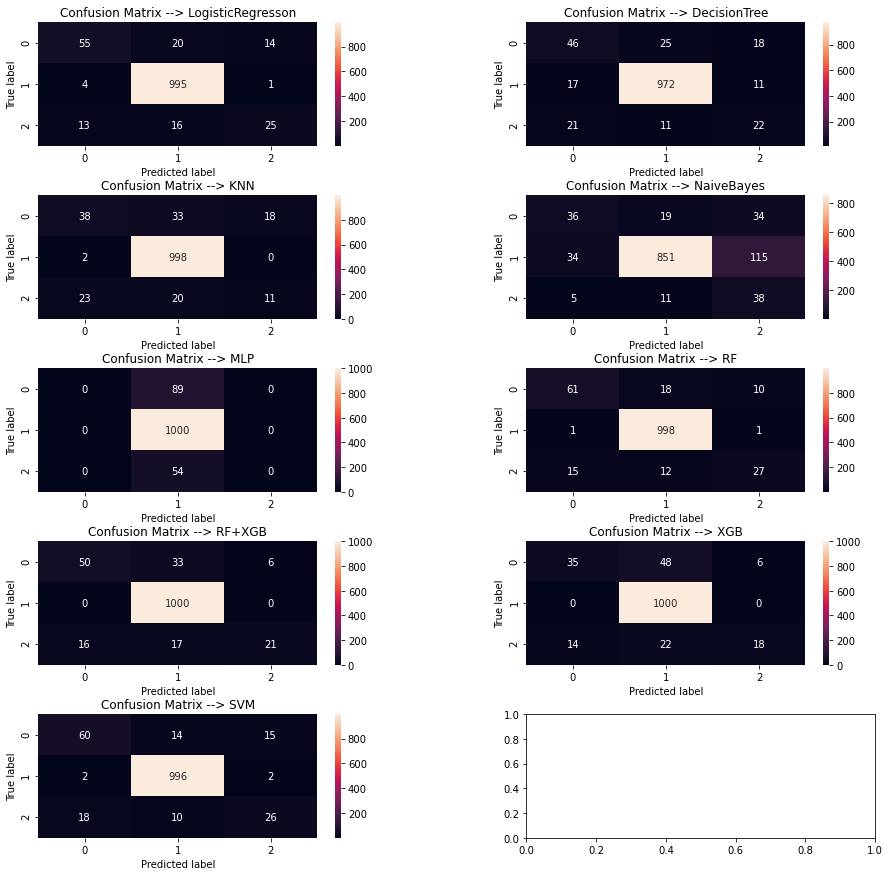

<Figure size 432x288 with 0 Axes>

In [12]:
# Plotting the Confusion Matrix

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = cross_val_predict(clf, X, y, cv=10,n_jobs=-1)
    cm = confusion_matrix(y, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y, y_predicted ,average=None)
    precision = precision_score(y, y_predicted ,average=None)
    recall = recall_score(y, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Treinamento com Oversampling(Smote)

In [13]:
#Oversampling usando SMOTE 
!pip install imblearn

from imblearn.over_sampling import SMOTE

strategy = {'COVID-19': 350, 'Not Covid': 350} 
oversample = SMOTE(sampling_strategy=strategy, k_neighbors=5)

In [14]:
#Acurácia dos métodos
from imblearn.pipeline import Pipeline

scores = []
std = []
for method, name in zip(methods, titles):
    # transform the dataset
    steps = [('over', oversample),('method' ,method)]
    pipeline = Pipeline(steps=steps)
    folds=10
    result = model_selection.cross_val_score(pipeline, X, y.ravel(), cv=folds,n_jobs=-1)
    scores.append(result.mean())
    print("Classification accuracy {} = {}"
          .format(name, result.mean(), result.std()))

/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

Classification accuracy LogisticRegresson = 0.9256598016781084
Classification accuracy DecisionTree = 0.9011289092295958
Classification accuracy KNN = 0.9282684973302823
Classification accuracy NaiveBayes = 0.7821281464530893
Classification accuracy MLP = 0.07786422578184592
Classification accuracy RF = 0.953630816170862
Classification accuracy RF+XGB = 0.9449199084668193
Classification accuracy XGB = 0.9422883295194507
Classification accuracy SVM = 0.9518993135011442


LogisticRegresson
          COVID-19    Normal  Not Covid
F1-Score  0.666667  0.972892   0.561404
Precisão  0.659341  0.976815   0.533333
Recall    0.674157  0.969000   0.592593


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.550725  0.961091   0.400000
Precisão  0.483051  0.971399   0.434783
Recall    0.640449  0.951000   0.370370


KNN
          COVID-19    Normal  Not Covid
F1-Score  0.573099  0.979104   0.457143
Precisão  0.597561  0.974257   0.470588
Recall    0.550562  0.984000   0.444444


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.426966  0.886721   0.250951
Precisão  0.426966  0.968047   0.157895
Recall    0.426966  0.818000   0.611111




/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19  Normal  Not Covid
F1-Score  0.144481     0.0        0.0
Precisão  0.077865     0.0        0.0
Recall    1.000000     0.0        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.752941  0.985608   0.633663
Precisão  0.790123  0.978325   0.680851
Recall    0.719101  0.993000   0.592593


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.717647  0.984127   0.600000
Precisão  0.753086  0.976378   0.652174
Recall    0.685393  0.992000   0.555556


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.713450  0.984554   0.518519
Precisão  0.743902  0.981132   0.518519
Recall    0.685393  0.988000   0.518519


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.733728  0.987039   0.666667
Precisão  0.775000  0.984095   0.649123
Recall    0.696629  0.990000   0.685185




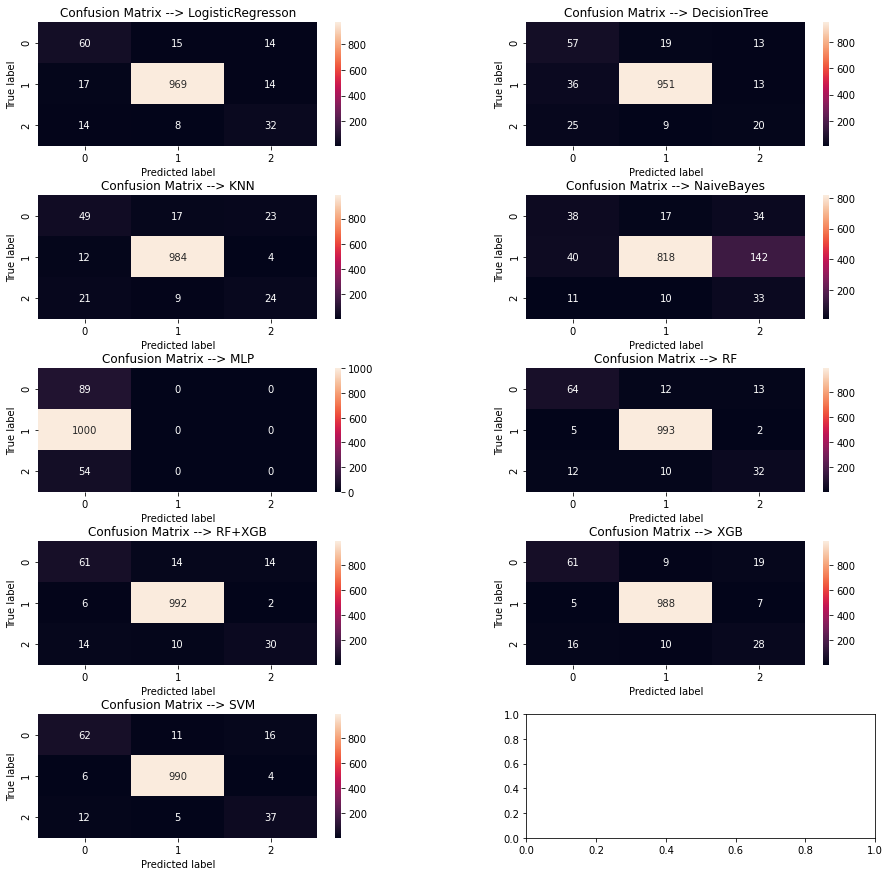

<Figure size 432x288 with 0 Axes>

In [25]:
fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']

for clf, ax, title in zip(methods, sub1.flatten(), titles):
    steps = [('over', oversample),('method' ,clf)]
    pipeline = Pipeline(steps=steps)   
    y_predicted = cross_val_predict(pipeline, X, y, cv=10,n_jobs=-1)
    cm = confusion_matrix(y, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y, y_predicted ,average=None)
    precision = precision_score(y, y_predicted ,average=None)
    recall = recall_score(y, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Treinamento com Oversampling (SMOTE) e Undersampling (TomekLinks)

In [27]:
#Oversampling (SMOTE) e Undersampling (TomekLinks)

from imblearn.combine import SMOTETomek

strategy = {'COVID-19': 350, 'Not Covid': 350} 
overUnder = SMOTETomek(smote=SMOTE(sampling_strategy=strategy, k_neighbors=5))

In [28]:
#Acurácia dos métodos
scores = []
std = []
for method, name in zip(methods, titles):
    # transform the dataset
    steps = [('overunder', overUnder),('method' ,method)]
    pipeline = Pipeline(steps=steps)
    folds=10
    result = model_selection.cross_val_score(pipeline, X, y.ravel(), cv=folds,n_jobs=-1)
    scores.append(result.mean())
    print("Classification accuracy {} = {}"
          .format(name, result.mean(), result.std()))

Classification accuracy LogisticRegresson = 0.9326392067124333
Classification accuracy DecisionTree = 0.9089778794813119
Classification accuracy KNN = 0.9230205949656751
Classification accuracy NaiveBayes = 0.7812433257055682
Classification accuracy MLP = 0.5554233409610984
Classification accuracy RF = 0.9501296720061021
Classification accuracy RF+XGB = 0.9466514111365371
Classification accuracy XGB = 0.9396567505720824
Classification accuracy SVM = 0.9501372997711671


LogisticRegresson
          COVID-19   Normal  Not Covid
F1-Score  0.651934  0.97338   0.561404
Precisão  0.641304  0.97780   0.533333
Recall    0.662921  0.96900   0.592593


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.535519  0.966867   0.486486
Precisão  0.521277  0.970766   0.473684
Recall    0.550562  0.963000   0.500000


KNN
          COVID-19   Normal  Not Covid
F1-Score  0.601156  0.98008   0.457143
Precisão  0.619048  0.97619   0.470588
Recall    0.584270  0.98400   0.444444


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.425287  0.887926   0.264151
Precisão  0.435294  0.968123   0.165877
Recall    0.415730  0.820000   0.648148




/home/renato/anaconda3/envs/CdD/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19    Normal  Not Covid
F1-Score  0.135952  0.636943        0.0
Precisão  0.078534  0.877193        0.0
Recall    0.505618  0.500000        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.752941  0.988586   0.633663
Precisão  0.790123  0.981281   0.680851
Recall    0.719101  0.996000   0.592593


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.674847  0.984615   0.574074
Precisão  0.743243  0.977340   0.574074
Recall    0.617978  0.992000   0.574074


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.666667  0.982090   0.555556
Precisão  0.708861  0.977228   0.555556
Recall    0.629213  0.987000   0.555556


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.748538  0.988506   0.666667
Precisão  0.780488  0.988012   0.633333
Recall    0.719101  0.989000   0.703704




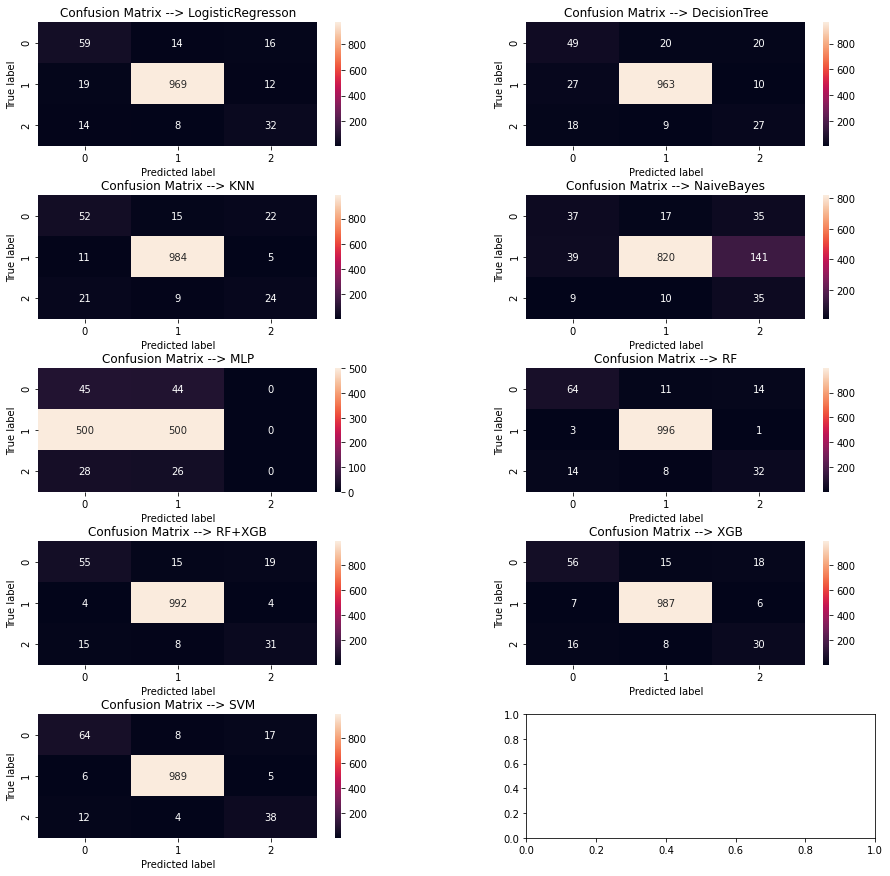

<Figure size 432x288 with 0 Axes>

In [26]:
fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']

for clf, ax, title in zip(methods, sub1.flatten(), titles):
    steps = [('overunder', overUnder),('method' ,clf)]
    pipeline = Pipeline(steps=steps)   
    y_predicted = cross_val_predict(pipeline, X, y, cv=10,n_jobs=-1)
    cm = confusion_matrix(y, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y, y_predicted ,average=None)
    precision = precision_score(y, y_predicted ,average=None)
    recall = recall_score(y, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout() 

In [ ]:
#Previsão para imagens novas usando RF

Z = pd.read_csv('/content/drive/My Drive/Pós Ciencia de Dados/Aplicações em Multimídia/Aula 3/feature_matrix_desafio-covid-multimedia-v2.csv', header=0)
Z=Z.to_numpy()
print(Z.shape)
rf.fit(X, y) #treinando usando a base inteira 

classPredicted = rf.predict(Z)
print(classPredicted)